##NYC Restaurant Code Violations

In [1]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('NYC_Restaurants.csv', dtype=unicode)

Create a unique name for each restaurant.

We added a column of unique names to df for restaurants by combining data from the 'DBA', "BUILDING', 'STREET' and 'ZIP CODE' columns 

In [3]:
df['RESTAURANT'] = df['DBA'] + ' '+ df['BUILDING'] + ' '+ df['STREET'] + ' '+ df['ZIPCODE']
df.head(2)

,Unnamed: 0,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,RESTAURANT
0,0,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,8,A,12/30/2014,02/12/2015,Cycle Inspection / Re-inspection,WENDY'S 469 FLATBUSH AVENUE 11225
1,1,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,8,A,12/30/2014,02/12/2015,Cycle Inspection / Re-inspection,WENDY'S 469 FLATBUSH AVENUE 11225


 How many restaurants are included in the data? 

We dropped any duplicate entries of 'RESTAURANT' in our df dataframe to ensure a dataframe of unique restaurants, then simply applied len() to get the number of restaurants

In [4]:
df_noduplicates = df.drop_duplicates(subset='RESTAURANT')
print len(df_noduplicates)
#df_noduplicates.head(2)

10114


 How many chains are there?

Chains were defined as 2 or more different 'RESTAURANTS' for one 'DBA' value. We took the value counts of the DBA column from df_noduplicates from question 2 and converted that series to a dataframe.  We then filtered the dataframe to only show DBA values that were listed more than once and applied the len() function to get the count of chains.

In [5]:
vc = (df_noduplicates['DBA'].value_counts())
df1 = vc.to_frame(name='valuecounts')
chains  = df1[df1.valuecounts > 1]
len(chains)

368

Plot a bar graph of the top 20 most popular chains. 

This was a simple plot of the top 20 chains

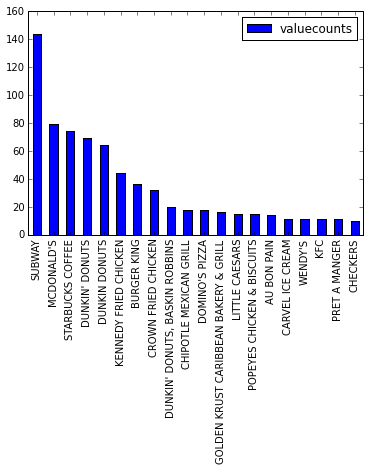

In [6]:
top_20_chains = chains[:20]
top_20_chains.plot(kind = 'bar')

What fraction of all restaurants are chains?

Using df1 from Q3, we applied a filter that returned only the restaurants that weren't chains. Next, we found the number of non chains with len() function and caclulated the fraction of chains in all restaurants using the non chain count and our answer from Q2.

In [7]:
df1
notchains  = df1[df1.valuecounts ==1]
len(notchains)

1.0-(1.0*len(notchains)/len(df_noduplicates))

0.16472216729286138

Plot the number of non-chain restaurants in each boro.

We made a pivot table off of a data frame filled with restaurants that weren't chains, using the borough as the index. From this we got the count in each borough and plotted the results.

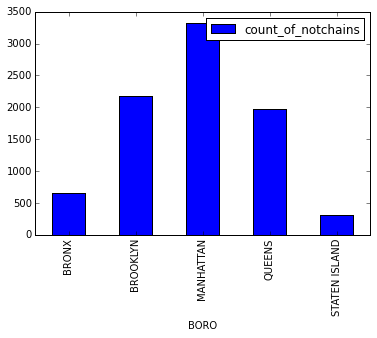

In [8]:
df_notchains = df_noduplicates.groupby("DBA").filter(lambda x: len(x) == 1)
boro_notchain_pivot = pd.pivot_table (df_notchains, index = 'BORO', values = 'RESTAURANT', aggfunc = lambda x: len(x.unique()))
boro_notchain_pivot = boro_notchain_pivot.to_frame(name = 'count_of_notchains')
boro_notchain_pivot.query('BORO != ["Missing"]').plot(kind = "bar")

Plot the fraction of non-chain restaurants in each boro.

We started by creating a pivot of BORO and RESTAURANTS from out df_noduplicates da and removed all missing values. Next, we appended this to our result from Q6 and divided the whole dataframe by the column we just appended. After removing the unecessary column, we plotted the resulting fractions by boro. 

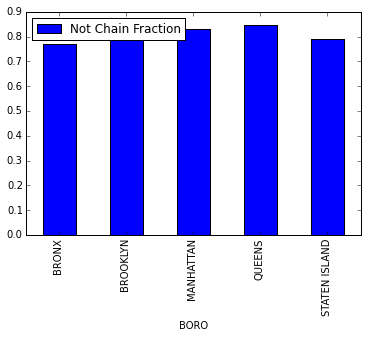

In [9]:
boro_restaurant_pivot = pd.pivot_table (df_noduplicates, index = 'BORO', values = 'RESTAURANT', aggfunc = lambda x: len(x.unique()))
boro_restaurant_pivot = boro_restaurant_pivot.to_frame(name='count_of_restaurants')
boro_notchain_pivot = boro_notchain_pivot.query('BORO != ["Missing"]')
boro_restaurant_pivot = boro_restaurant_pivot.query('BORO != ["Missing"]')
boro_notchain_pivot['TOTAL RESTAURANTS'] = boro_restaurant_pivot
fraction = boro_notchain_pivot.div(boro_notchain_pivot['TOTAL RESTAURANTS'], axis='index')
fraction = fraction.drop('TOTAL RESTAURANTS', 1)
fraction.columns.values[0] = 'Not Chain Fraction'
fraction.plot(kind = "bar")

Plot the popularity of cuisines.

We will simply find the value counts from the no duplicates data frame of each cuisine type. We put that in a series variable, then plot the top 20 values of the variable.

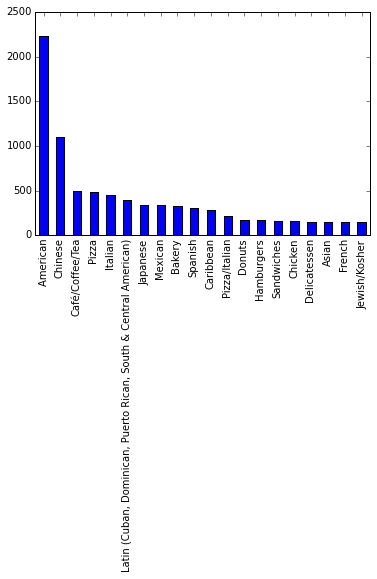

In [10]:
cuis = df_noduplicates['CUISINE DESCRIPTION'].value_counts()
cuis[:20].plot(kind='bar')

Plot the cuisines among restaurants which do not get cited for violations.

We will first create a mask to see if the violation code is null. We will then filter the original dataframe on that mask. Finally, we will get the value_counts from the Cuisine field of the masked dataframe and plot the results. 

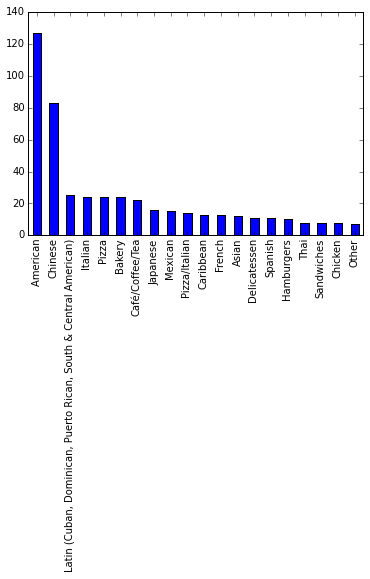

In [11]:
mask = (df['VIOLATION CODE']).isnull()
no_violations = df[mask]
no_violations[['CUISINE DESCRIPTION', 'RESTAURANT']]
cuisine_no_violations = no_violations['CUISINE DESCRIPTION'].value_counts()
cuisine_no_violations[:20].plot(kind='bar')

What cuisines tend to be the “cleanest”?

We will first do the opposite of question 9, creating a mask to find all the instances where there was a violation. We will then make a dataframe putting the violations series and the non_violations series together. We will add a column to calculate the total number of instances. Finally, we will add a column to calculate the ratio of no violations to all instances and sort on that column. 

In [12]:
mask = (df['VIOLATION CODE']).notnull()
violations = df[mask]

cuisine_violations = violations['CUISINE DESCRIPTION'].value_counts()

total_cuisine = pd.concat([cuisine_violations , cuisine_no_violations], axis = 1)


total_cuisine.columns = ['VIOLATIONS', 'NO VIOLATIONS']
total_cuisine = total_cuisine.fillna(0)
total_cuisine['TOTAL INSTANCES'] = total_cuisine['VIOLATIONS'] + total_cuisine['NO VIOLATIONS']

new_mask = (total_cuisine['TOTAL INSTANCES'] >= 20)
total_cuisine = total_cuisine[new_mask]
total_cuisine['PERCENT NO VIOLATIONS'] = total_cuisine['NO VIOLATIONS']*100 / total_cuisine['TOTAL INSTANCES']
total_cuisine.sort(['PERCENT NO VIOLATIONS'], ascending=False)

,VIOLATIONS,NO VIOLATIONS,TOTAL INSTANCES,PERCENT NO VIOLATIONS
Creole,48,2,50,4.000000
Chinese/Cuban,53,2,55,3.636364
Barbecue,93,3,96,3.125000
Soups & Sandwiches,63,2,65,3.076923
Continental,67,2,69,2.898551
Other,267,7,274,2.554745
Peruvian,168,4,172,2.325581
Russian,171,4,175,2.285714
French,587,13,600,2.166667
Bangladeshi,146,3,149,2.013423


What are the most common violations in each borough

In our approach we used the crosstab() function to calculate the number of occurrences for each violation description by borough. Next we transposed the axes using stack() & unstack(). Then we created a dataframe called mostcommon that provides the most common violation in each borough along with its count.

In [13]:
violations = pd.crosstab(df['BORO'], df['VIOLATION DESCRIPTION']).query('BORO != ["Missing"]')
vstack = violations.stack()
violations2 = vstack.unstack('BORO')
mostcommon = DataFrame({'Most Common Complaint':violations2.idxmax(),'Number of Complaints':violations2.max()}) 
mostcommon

,Most Common Complaint,Number of Complaints
BORO,,
BRONX,Non-food contact surface improperly constructe...,500
BROOKLYN,Non-food contact surface improperly constructe...,1485
MANHATTAN,Non-food contact surface improperly constructe...,2417
QUEENS,Non-food contact surface improperly constructe...,1416
STATEN ISLAND,Non-food contact surface improperly constructe...,230


What are the most common violations per borough, after normalizing for the relative abundance of each violation? 

Building on our answer from above, we created a series called vtotals that provided a count of violations by violation description. Next we added this column to our dataframe violations2 from the previous question and divided the whole dataframe by that column. After removing the column corresponding to vtotals, we created a new dataframe called mostcommon2 that provides the max value and corresponding index (or violation description) for each borough.

In [14]:
vtotals = df['VIOLATION DESCRIPTION'].value_counts()
violations2['VIOLATION FREQUENCY'] = vtotals
norm = violations2.div(violations2['VIOLATION FREQUENCY'], axis='index')
normalized = norm.drop('VIOLATION FREQUENCY', 1)
mostcommon2 = DataFrame({'Most Common Complaint':normalized.idxmax(),'Number of Complaints':normalized.max()}) 
mostcommon2



,Most Common Complaint,Number of Complaints
BORO,,
BRONX,Unprotected food re-served.,0.500000
BROOKLYN,Precooked potentially hazardous food from comm...,0.714286
MANHATTAN,Out-of package sale of tobacco products observed.,1.000000
QUEENS,Caloric content range (minimum to maximum) not...,1.000000
STATEN ISLAND,"Eggs found dirty/cracked; liquid, frozen or po...",0.090909


How many phone area codes correspond to a single zipcode

For this question, we used the duplicate dropping method twice. First, we copied a new data frame with just zipcode and phone number, then dropped duplicates of phone numbers. Phone numbers and zip codes have a many to one relationship. One zip code can have many phone numbers, but each phone number belongs to one and only one restaurant, hence belongs solely to a unique zip code. Dropping duplicates of phone number would give us one row per restaurant in the new dataframe. Next, a mask was created to ensure the cell values were legitimately numbers. Spaces were removed, since there were phone numbers in the format 'XXX YYY ZZZZ' in the dataset, as opposed 'XXXYYYZZZZ'. We finally took the first 3 digits to be areacode and mapped them back to phone. At this point, it was a matter of dropping duplicates again. Dropping duplicate area codes gave us the area codes that matched up uniquely with zipcodes.

In [15]:
newdf = df[['ZIPCODE','PHONE']].copy()
newdf = newdf.drop_duplicates(subset='PHONE')
mask = newdf['PHONE'].str.contains('^[1-9]')
newdf = newdf[mask]
newdf['PHONE'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
newdf.head(2)
newdf['PHONE'] = newdf['PHONE'].map(lambda x: str(x)[0:3])
newdf = newdf.drop_duplicates(subset='PHONE')
newdf
len(newdf['PHONE'])

54

Find common misspellings of street names.

For this question, we created a STREET TYPE column by stripping street of spaces, splitting by space, then grabbing the last word. We then created a STREET BASE column by returning words minus the last word if it contains more than 1 word, else return NaN. Next, we created a STREET BASE & ZIP column that adds the street base and zip code columns together. We combined the 3 columns by creating an empty dataframe and adding each column into it, removing NA's using dropna and duplicates using drop_duplicates. We merged the table with itself on 'street base & zip' and masked the table where the street types are not the same. We then made a crosstab of the 2 street types and returned the max value index for each of the street types indicated.

In [16]:
df['STREET TYPE'] = df['STREET'].apply(lambda x : x.strip(" ").split(" ")[-1])

def get_streetbase(x):
    if len(x.strip(" ").split(" ")) > 1:
        return " ".join(x.strip(" ").split(" ")[0:len(x.strip(" ").split(" "))-1])
    else:
        return NaN
df['STREET BASE'] = df['STREET'].apply(get_streetbase)

df['STREET BASE & ZIP'] = df['STREET BASE'] + ' ' + df['ZIPCODE']

streetname_table = pd.DataFrame()
streetname_table['street type'] = df['STREET TYPE']
streetname_table['street base'] = df['STREET BASE']
streetname_table['street base & zip'] = df['STREET BASE & ZIP']
streetname_table.dropna(how='any',subset=['street base'],inplace=True)
streetname_table=streetname_table.drop_duplicates()

merge = pd.merge(streetname_table, streetname_table,on='street base & zip')

mask = (merge['street type_x'] != merge['street type_y'])
streetname_table_multitypes=merge[mask]

street_type_lookup=pd.crosstab(streetname_table_multitypes['street type_x'], [streetname_table_multitypes['street type_y']])

street_type_lookup['AVE'].idxmax()
street_type_lookup['ST'].idxmax()
street_type_lookup['RD'].idxmax()
street_type_lookup['PL'].idxmax()
street_type_lookup['BOULEARD'].idxmax()
street_type_lookup['BULEVARD'].idxmax()



'BLVD'